In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalizing using ImageNet statistics
])


In [4]:
# Load dataset
dataset = datasets.ImageFolder(root=r'C:\Users\gdk14\Desktop\gruhit college\Healthcare Analytics sem 4\yoga pose detection\data', transform=transform)


In [5]:
# Split dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

In [6]:
# Create DataLoader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


In [7]:
# Define ResNet model
model = torchvision.models.resnet18(pretrained=True)  # Pretrained ResNet-18
num_classes = len(dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Change output layer to match number of classes

C:\Users\gdk14\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\gdk14\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
# Send model to device
model = model.to(device)


In [9]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    # Training
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        
        # Track accuracy
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
    
    # Calculate training loss and accuracy
    epoch_loss = running_loss / len(train_loader.dataset)
    accuracy = correct_predictions / total_predictions
    
    # Print training loss and accuracy
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.4f}")
    
    # Validation
    model.eval()
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    val_accuracy = val_correct / val_total
    print(f"Validation Accuracy after Epoch [{epoch+1}/{num_epochs}]: {val_accuracy:.4f}")


C:\Users\gdk14\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [1/20], Loss: 1.7526, Accuracy: 0.5585
Validation Accuracy after Epoch [1/20]: 0.6975
Epoch [2/20], Loss: 0.6023, Accuracy: 0.8348
Validation Accuracy after Epoch [2/20]: 0.7283
Epoch [3/20], Loss: 0.3219, Accuracy: 0.9211
Validation Accuracy after Epoch [3/20]: 0.7862
Epoch [4/20], Loss: 0.1712, Accuracy: 0.9569
Validation Accuracy after Epoch [4/20]: 0.7572
Epoch [5/20], Loss: 0.1314, Accuracy: 0.9646
Validation Accuracy after Epoch [5/20]: 0.7518
Epoch [6/20], Loss: 0.0992, Accuracy: 0.9755
Validation Accuracy after Epoch [6/20]: 0.8116
Epoch [7/20], Loss: 0.0669, Accuracy: 0.9814
Validation Accuracy after Epoch [7/20]: 0.7736
Epoch [8/20], Loss: 0.0608, Accuracy: 0.9868
Validation Accuracy after Epoch [8/20]: 0.8243
Epoch [9/20], Loss: 0.0385, Accuracy: 0.9923
Validation Accuracy after Epoch [9/20]: 0.8315
Epoch [10/20], Loss: 0.0336, Accuracy: 0.9891
Validation Accuracy after Epoch [10/20]: 0.8043
Epoch [11/20], Loss: 0.0722, Accuracy: 0.9823
Validation Accuracy after Epoch 

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import numpy as np

# Validation
model.eval()
val_correct = 0
val_total = 0
val_predictions = []
val_targets = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        val_total += labels.size(0)
        val_correct += (predicted == labels).sum().item()
        
        val_predictions.extend(predicted.cpu().numpy())
        val_targets.extend(labels.cpu().numpy())

val_accuracy = val_correct / val_total
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(val_targets, val_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate F1 score
f1 = f1_score(val_targets, val_predictions, average='macro')
print(f"F1 Score: {f1:.4f}")

# Generate classification report
class_names = dataset.classes
report = classification_report(val_targets, val_predictions, target_names=class_names)
print("Classification Report:")
print(report)


Validation Accuracy: 0.8641
Confusion Matrix:
[[19  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  1]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  1  0]
 [ 0  0  0 ...  0 14  0]
 [ 0  0  0 ...  0  0  8]]
F1 Score: 0.8302
Classification Report:
                               precision    recall  f1-score   support

         Adho Mukha Svanasana       0.90      0.83      0.86        23
         Adho Mukha Vrksasana       0.83      0.67      0.74        15
                    Alanasana       0.17      0.50      0.25         2
                 Anjaneyasana       1.00      0.62      0.77         8
            Ardha Chandrasana       0.83      1.00      0.91         5
         Ardha Matsyendrasana       0.93      1.00      0.97        14
               Ardha Navasana       0.67      1.00      0.80         2
      Ardha Pincha Mayurasana       0.85      0.92      0.88        12
            Ashta Chandrasana       0.00      0.00      0.00         4
              Baddha Konasana       0.86      0

C:\Users\gdk14\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gdk14\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gdk14\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


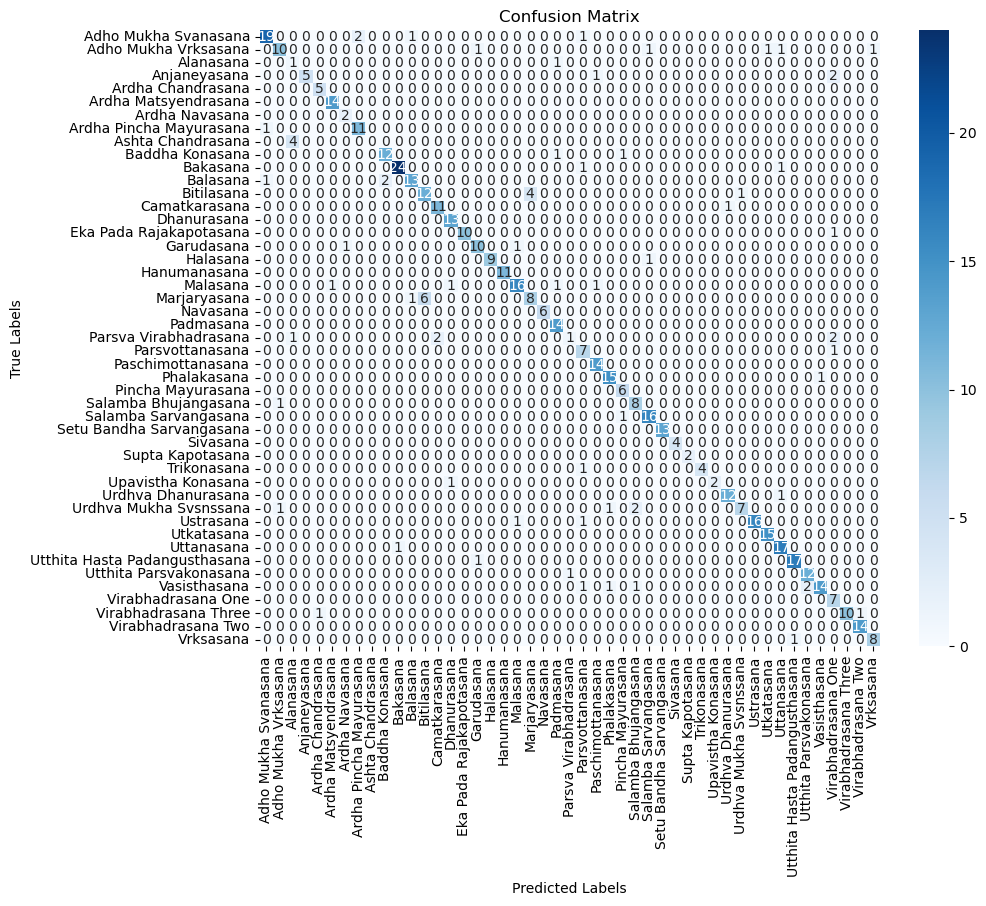

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [13]:
# Split dataset into training, validation, and test sets
train_size = int(0.7 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

# Create DataLoader for test set
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Test
model.eval()
test_correct = 0
test_total = 0
test_predictions = []
test_targets = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()
        
        test_predictions.extend(predicted.cpu().numpy())
        test_targets.extend(labels.cpu().numpy())

test_accuracy = test_correct / test_total
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.9746


In [14]:
import os

# Define file path to save the model
model_dir = r'C:\Users\gdk14\Desktop\gruhit college\Healthcare Analytics sem 4\yoga pose detection'
os.makedirs(model_dir, exist_ok=True)

# Define file path to save the model within the directory
model_path = os.path.join(model_dir, 'resnet_model2.pth')

# Save the model
torch.save(model.state_dict(), model_path)

print(f"Model saved to {model_path}")


Model saved to C:\Users\gdk14\Desktop\gruhit college\Healthcare Analytics sem 4\yoga pose detection\resnet_model2.pth
